<a href="https://colab.research.google.com/github/Vineet2107/Deep-Neural-Networks-with-PyTorch/blob/main/Assignment1_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
% matplotlib inline

In [98]:
train_path = '/content/drive/MyDrive/mod_ravelling_dataset/train'
test_path = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [99]:
Non_raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'
Raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Raveling'

In [100]:
Non_raveling_data

'/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'

In [101]:
list_nr = os.listdir(Non_raveling_data)
list_r = os.listdir(Raveling_data)

In [102]:
list_nr[0]

'image466.jpg'

In [103]:
#list_r = (os.listdir(Raveling))

In [104]:
#list_r[:5]

In [105]:
img = []

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


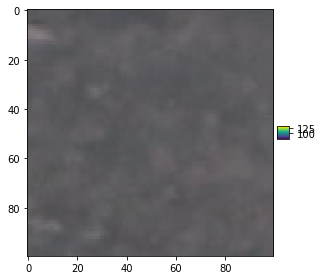

In [106]:
img_nr = []

for i in range(len(list_nr)):
  img = io.imread(os.path.join(Non_raveling_data,list_nr[i]))
  img_nr.append(np.array(img))
  io.imshow(img)


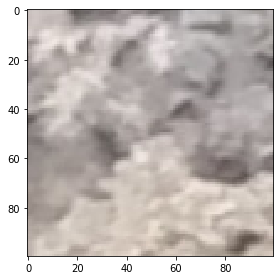

In [107]:
img_r = []

for i in range(len(list_r)):
  img = io.imread(os.path.join(Raveling_data,list_r[i]))
  img_r.append(np.array(img))
  io.imshow(img)

In [108]:
print(len(img_nr))
print(len(img_r))

351
349


In [109]:
img_nr = np.array(img_nr)
img_r = np.array(img_r)

In [110]:
print(img_nr.shape)
print(img_r.shape)

(351, 100, 100, 3)
(349, 100, 100, 3)


In [111]:
#def mean(arr[][]):


In [112]:
rows, cols = (351, 13)
imgprop_nr = [[0]*cols]*rows
print(imgprop_nr)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

In [113]:
rows, cols = (349, 13)
imgprop_r = [[0]*cols]*rows
print(imgprop_r)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

In [114]:



for i in range(len(img_nr)):
  imgprop_nr[i][0] = np.mean(img_nr[i][:,:,0])
  imgprop_nr[i][1] = np.std(img_nr[i][:,:,0])
  #imgprop[i][2] = kurtosis(image_nr[i][][2])
  #imgprop[i][3] = skewness(image_nr[i][][3])
  imgprop_nr[i][2] = np.mean(img_nr[i][:,:,1])
  imgprop_nr[i][3] = np.std(img_nr[i][:,:,1])
  #imgprop[i][6] = kurtosis(image_nr[i][][2])
  #imgprop[i][7] = skewness(image_nr[i][][3])
  imgprop_nr[i][4] = np.mean(img_nr[i][:,:,2])
  imgprop_nr[i][5] = np.std(img_nr[i][:,:,2])
  #imgprop[i][10] = kurtosis(image_nr[i][][2])
  #imgprop[i][11] = skewness(image_nr[i][][3])
    
  


In [115]:
for i in range(len(img_r)):
  imgprop_r[i][0] = np.mean(img_r[i][:,:,0])
  imgprop_r[i][1] = np.std(img_r[i][:,:,0])
  #imgprop[i][2] = kurtosis(image_nr[i][][2])
  #imgprop[i][3] = skewness(image_nr[i][][3])
  imgprop_r[i][2] = np.mean(img_r[i][:,:,1])
  imgprop_r[i][3] = np.std(img_r[i][:,:,1])
  #imgprop[i][6] = kurtosis(image_nr[i][][2])
  #imgprop[i][7] = skewness(image_nr[i][][3])
  imgprop_r[i][4] = np.mean(img_r[i][:,:,2])
  imgprop_r[i][5] = np.std(img_r[i][:,:,2])
  #imgprop[i][10] = kurtosis(image_nr[i][][2])
  #imgprop[i][11] = skewness(image_nr[i][][3])

In [116]:
print(imgprop_nr)

[[142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.16587125396386, 141.5965, 39.80814850944464, 140.069, 38.79232964130925, 0, 0, 0, 0, 0, 0, 0], [142.5871, 40.1658

In [117]:
print(imgprop_r)

[[180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0, 0, 0], [180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0, 0, 0], [180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0, 0, 0], [180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0, 0, 0], [180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0, 0, 0], [180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0, 0, 0], [180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0, 0, 0], [180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0, 0, 0], [180.8928, 28.412143674140463, 171.7598, 27.71694975930793, 167.3595, 26.357705889359945, 0, 0, 0, 0, 0

In [118]:
for i in range(351):
  imgprop_nr[i][12] = 0

In [119]:
for i in range(349):
  imgprop_r[i][12] = 1

In [120]:
for i in imgprop_r :
    imgprop_nr.append(i)

In [121]:
print(len(imgprop_nr))

700


In [122]:
imgprop = imgprop_nr

In [123]:
len(imgprop)

700

In [125]:
print(imgprop[350][12])
print(imgprop[351][12])


0
1


In [127]:
X_train = imgprop[][:,0 : 11]

TypeError: ignored

In [129]:
y_train = imgprop[][12]

SyntaxError: ignored

In [ ]:
images_nr = np.array(images_nr)

In [ ]:
images_nr.shape

(351, 100, 100, 3)

In [ ]:
path = os.path.join(Non_raveling_data,list_nr[0])

In [ ]:
path

'/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling/image466.jpg'

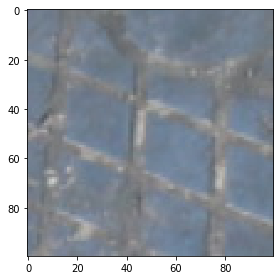

In [ ]:
for i in range(10):
  img = io.imread(os.path.join(Non_raveling_data,list_nr[i]))
  io.imshow(img)
